In [130]:
import numpy as np
import requests
import pandas as pd
import json as js
import io
import pprint as pp
import datetime
import matplotlib.pyplot as plt

In [143]:
loc_dict = {
    'st_albans_station':'STATION%5E8573',
}
nr_results = 24
min_beds = 3
max_beds = 3
min_price = 400000
max_price = 800000
radius = '3.0'
sort_type = '1'
property_type = 'detached%2Csemi-detached%2Cterraced'
starting_position = '48'

In [131]:
url_base = "https://api.rightmove.co.uk/api/sale/find?\
index={starting_position}\
&sortType=1\
&numberOfPropertiesRequested={nr_results}\
&locationIdentifier=STATION%5E8573\
&minBedrooms={min_beds}\
&maxBedrooms={max_beds}\
&propertyTypes={property_type}\
&maxPrice={max_price}\
&minPrice={min_price}\
&radius={radius}\
&apiApplication=IPAD"

In [144]:
url = url_base.format(location = loc_dict['st_albans_station'], 
                      min_beds = min_beds, max_beds = max_beds, 
                      max_price = max_price, min_price = min_price,
                      radius = radius, property_type = property_type,
                      nr_results = nr_results, starting_position = starting_position
                     )

In [157]:
r = requests.get(url)
r.close()

In [ ]:
'result': 'SUCCESS',
 'retrieveSavedSearchByFiltersResult': {'savedSearches': []},
 'searchableLocation': {'centreLatitude': 51.75054891855521,
                        'centreLongitude': -0.3304184046240383,
                        'identifier': 'STATION^8573',
                        'name': 'St. Albans Station, St. Albans, '
                                'Hertfordshire'},
 'southLatitude': 51.70802366870754,
 'totalAvailableResults': 111,
 'transactionTypeId': 1,
 'westLongitude': -0.4020362322975422}

In [162]:
js.loads(r.text)['result']

'SUCCESS'

In [161]:
pp.pprint(js.loads(r.text))

{'cacheTimeout': 15,
 'createDate': 1579351402105,
 'eastLongitude': -0.25866605794592146,
 'featuredProperties': [{'address': 'Beverley Gardens, St. Albans',
                         'autoEmailReasonType': 'new',
                         'bedrooms': 3,
                         'branch': {'address': '5 Wycombe Place\r\n'
                                               'Marshalswick\r\n'
                                               'St. Albans\r\n'
                                               'AL4 9RH ',
                                    'branchLogo': 'https://media.rightmove.co.uk/dir//company/clogo_rmchoice_43_0000.jpeg',
                                    'brandName': 'Connells',
                                    'brandPlusLettings': False,
                                    'brandPlusResale': True,
                                    'contactTelephoneNumber': '01727 851100',
                                    'development': False,
                                    'hideR

In [146]:
out_dict = js.loads(r.content)

In [147]:
def extract_property(prop_dict):
    prop = {}
    prop['address'] = prop_dict['address']
    prop['bedrooms'] = prop_dict['bedrooms']
    prop['distance'] = prop_dict['distance']
    prop['photoCount'] = prop_dict['photoCount']
    prop['propertyType'] = prop_dict['propertyType']
    prop['price'] = prop_dict['price']
    prop['updateDateStr'] = datetime.datetime.fromtimestamp(int(prop_dict['updateDate'])/1000).strftime('%Y-%m-%d')
    prop['updateDate'] = datetime.datetime.fromtimestamp(int(prop_dict['updateDate'])/1000)
    prop['latitude'] = prop_dict['latitude']
    prop['longitude'] = prop_dict['longitude']
    prop['floorplanCount'] = prop_dict['floorplanCount']
    prop['sortDate'] = datetime.datetime.fromtimestamp(int(prop_dict['sortDate'])/1000)
    prop['sortDateStr'] = datetime.datetime.fromtimestamp(int(prop_dict['sortDate'])/1000).strftime('%Y-%m-%d')
    prop['identifier'] = prop_dict['identifier']
    prop['premiumDisplay'] = prop_dict['premiumDisplay']
    prop['autoEmailReasonType'] = prop_dict['autoEmailReasonType']
    prop['premiumDisplay'] = prop_dict['premiumDisplay']
    prop['priceQualifier'] = prop_dict['priceQualifier']
    return prop

In [148]:
# GET ALL VARIABLES 
# pp.pprint(out_dict['properties'][1])

## INDUSTRIALISE

In [150]:
out_dict = js.loads(r.content)
props_list = []
for i in range(len(out_dict['properties'])):
    p = extract_property(out_dict['properties'][i])
    props_list.append(p)

df = pd.DataFrame(props_list)

In [151]:
df.head()

,address,bedrooms,distance,photoCount,propertyType,price,updateDateStr,updateDate,latitude,longitude,floorplanCount,sortDate,sortDateStr,identifier,premiumDisplay,autoEmailReasonType,priceQualifier
0,"Dellfield, St. Albans",3,0.4661,13,terraced house,400000.0,2020-01-18,2020-01-18 02:31:32,51.74699,-0.321190,3,2019-12-26 06:19:54,2019-12-26,76395457,True,new,
1,"Drakes Drive, St Albans, Hertfordshire",3,1.1306,13,end of terrace house,415000.0,2019-10-30,2019-10-30 09:37:40,51.73832,-0.312933,0,2019-03-23 15:51:06,2019-03-23,80378543,True,new,Guide Price
2,"Drakes Drive, St. Albans",3,1.1349,10,end of terrace house,415000.0,2019-11-15,2019-11-15 14:39:46,51.73827,-0.312870,1,2019-04-16 17:58:09,2019-04-16,61694094,True,new,
3,"Halsey Park, London Colney, AL2",3,2.9877,1,end of terrace house,415000.0,2020-01-14,2020-01-14 13:40:08,51.71774,-0.285137,1,2019-12-26 10:10:16,2019-12-26,67282608,True,new,
4,"Windmill Avenue, St. Albans, Hertfordshire",3,1.8828,14,terraced house,420000.0,2019-11-29,2019-11-29 11:03:29,51.77162,-0.302626,1,2019-11-08 12:03:54,2019-11-08,86412005,True,new,


In [152]:
df.shape

(24, 17)

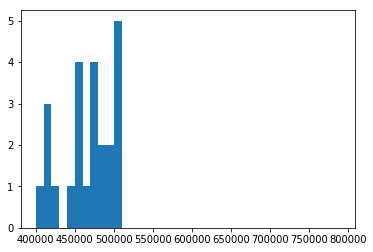

In [153]:
plt.hist(df.price, bins = np.arange(min_price, max_price, 10000));

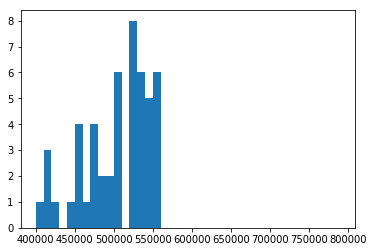

In [94]:
plt.hist(df.price, bins = np.arange(min_price, max_price, 10000));

In [164]:
str.lower('ABC')

'abc'